# Partie 3: Identification des paramètres d'un modèle

- [Problématique générale](#PbGeneral)
- [Problème des moindres carrés](#moindresCarres)
- [Modèles de régression linéaire](#regressionLin)
- [Cas non linéaire: algorithmes de minimisation](#casNLin)
    - [Minimum global ou local : importance de la condition initiale](#minLocalGlobal)
    - [Méthode du gradient](#gradient)
    - [Méthode de Newton-Raphton](#NewtonRaphton)
- [Quelques remarques pour finir](#remarquesFinir)


In [1]:
# -*- coding: utf-8 -*-
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Pour afficher le code python, cliquer sur le bouton: 
<button onclick="javascript:code_toggle()">Afficher code python</button>
''')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
#from IPython.html.widgets import interact, fixed
#import scipy.integrate as scint
#from matplotlib import patches as pat
%matplotlib inline

## <a name="PbGeneral">Problématique générale</a>
Une fois que l'on s'est fixé un modèle, se pose la question de la valeur des paramètres de ce modèle. Les valeurs des paramètres du modèle peuvent être tirées de la litérature ou bien être identifiées à partir de données expérimentales. Dans ce chapitre, la question que nous allons nous poser se formule de la manière suivante:

> **Question**: étant donné certaines données expérimentales, et étant donné un modèle de paramètres $\theta$, quelles sont les valeurs $\hat{\theta}$ des paramètres $\theta$ qui permettent d'obtenir des sorties simulées les plus proches des mesures?

Cette question est formulée mathématiquement comme un problème de minimisation d'une **fonction objectif** $J(\theta)$, de la forme:
$$
\hat{\theta}=\text{argmin}_{\theta \in \Omega}J(\theta)
$$
où $\Omega$ est l'ensemble des valeurs des paramètres $\theta$ admissibles.

La notion de proximité qui apparaît dans la question est évidemment à clarifier: on souhaite que les sorties simulées soient proches des valeurs mesurées, mais en quel sens? selon quelle distance?


En mathématique, la **notion de distance** est primordiale, car elle permet justement de quantifier l'éloignement entre deux objets de même nature. Dans ce chapitre, nous allons considérer un distance "intuitive", qui est la **distance euclidienne**, définie comme la racine de la somme des différences au carré, c'est à dire:
$$
d(x,y) = \sqrt{\sum_{i=1}^N (x_i-y_i)^2}
$$
où $x=(x_1,...,x_N)^T$ et $y=(y_1,...,y_N)^T$ sont deux vecteurs de $\mathbb{R}^N$ qui dans notre cas vont représenter le vecteur des données simulées (obtenues avec le modèle et donc dépendantes des paramètres $\theta$) et le vecteur des données mesurées expérimentalement.

Plus exactement, nous utiliseront la **distance euclidienne pondérée** définie de la manière suivante:
$$
d(x,y) = \sqrt{\sum_{i=1}^N \beta_i(x_i-y_i)^2}
$$
où les poids $\beta_i$ sont positifs.


Pour répondre à la question précédente, nous allons donc chercher à minimiser cette distance. Minimiser la racine d'une quantité ou cette quantité revenant au même, par simplicité, nous chercherons à minimiser la somme des distances au carré, ce que l'on appelle le **problème des moindres carrés**. 

## <a name="moindresCarres">Problème des moindres carrés</a>

Dans le problème de moindres carrés, la fonction objectif $J(\theta)$ considérée est donnée par: 
$$
J(\theta)=\sum_{i=1}^N\beta_i (y_i(\theta)-y_i^m)^2
$$
où:
- $\theta$ est le **vecteur de paramètres** du modèle
- $N$ est le **nombre d'instants** $t_i$ d'observation
- $y_i^m$ est le **vecteur des observations (mesures)** à l'instant $t_i$
- $y_i(\theta)$ est le **vecteur des estimations données** par le modèle à l'instant $t_i$ en fonction de $\theta$
- $\beta_i$ est un **coefficient de pondération** pouvant être différent selon l'instant d'observation

La solution du problème de moindre carrés ainsi que la méthode à utiliser pour la trouver dépend de la forme du modèle utilisé.

## <a name="regressionLin">Modèles de regression linéaire</a>
On se place dans un premier temps dans le cas où le modèle considéré s'écrit linéairement par rapport à $\theta$, c'est à dire sous la forme:
$$
y_i(\theta)=\phi_i^T \theta
$$
où $\phi_i$ est un vecteur de même taille que $\theta$ appelé **régresseur**.

Ce type de modèle est appelé **modèle de regression linéaire**.

Le **problème de moindres carrés** évoqué précédemment s'écrit alors dans ce cas:
$$
\min_{\theta \in \Omega} J(\theta)=\min_{\theta \in \Omega}\sum_{i=1}^N\beta_i (\phi_i^T \theta-y_i^m)^2
$$

C'est un problème que l'on sait résoudre analytiquement. Sa solution, que l'on sait unique, est appelée **estimateur des moindres carrés** et est donnée par:
$$
\hat{\theta}=\left[ \sum_{i=1}^N \beta_i \phi_i \phi_i^T \right]^{-1} \sum_{i=1}^N \beta_i \phi_i y_i
$$
Cet estimateur existe si la matrice $\sum_{i=1}^N \beta_i \phi_i \phi_i^T$ est inversible. 

**Rappel**: pour rechercher le minimum ou maximum d'une fonction, on se ramène souvent au problème de recherche des points qui annulent la dérivée de cette fonction.

$$ x_{min} = argmin_{x\in \mathbb{R}} f(x) \Longrightarrow f^\prime(x_{min})=0$$

Les modèles de la biologie sont souvent non linéaires. Néanmoins, il est quand même parfois possible de transformer le modèle de sorte à faire apparaître les paramètres de manière linéaire ce qui facilite grandement la résolution du problème de moindres carrés. L'exemple ci-dessous va dans ce sens.

> <u>Exemple</u>: **modèle d'une fonction de croissance de type Monod**
> $$ \mu(S)=k\frac{S}{a+S} $$
> Supposons qu'aux instants $t_i$ $i=1:N$ on mesure le taux de croissance et le substrat. Notons $\mu_i$ et $S_i$ ces mesures. On a alors, pour tout $i=1:N$:
> $$ \mu_i=k\frac{S_i}{a+S_i} $$
> On souhaiterait trouver les paramètres $a$ et $k$ de ce modèle à partir des mesures $S_i$ et $\mu_i$. 

> Le modèle de Monod n'est pas linéaire en les paramètres. Cependant, en multipliant l'équation par $(a+S)$ on a:
> $$ \mu_i=k\frac{S_i}{a+S_i} \Longleftrightarrow (a+S_i)\mu_i=k S_i \Longleftrightarrow S_i\mu_i=k S_i -a\mu_i \Longleftrightarrow S_i\mu_i=[S_i\, -\mu_i] \left[\begin{array}{c}k \\ a \end{array}\right] $$
> On retombe donc bien sur un modèle de regression linéaire de la forme:
> $$ y_i(\theta)=y_i^m $$
> avec:
> $y_i^m= S_i\mu_i$, $y_i(\theta)=\phi_i^T \theta$, $\theta=\left[\begin{array}{c}k \\a \end{array}\right]$ et $\phi_i =\left[\begin{array}{c}S_i \\ -\mu_i \end{array}\right]$

**Application numérique**

Test de la qualité de l'estimation de la fonction de Monod en fonction:
- du nombre de mesures $N$
- de l'écart type $\sigma_1$ du bruit de mesure sur $\mu_i$
- de l'écart type $\sigma_2$ du bruit de mesure sur $S_i$

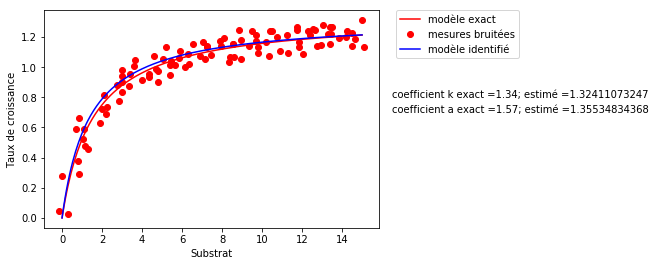

<function __main__.identifMonod>

In [3]:
# Identification des paramètres a et k d'une fonction de Monod via l'estimateur des moindres carrés linéaires
# -----------------------------------------------------------------------------------------------------------
def identifMonod(N,sigma1,sigma2):
    # N : nombre d'observation
    # sigma1 : ecart type bruit de mesure sur mu
    # sigma2 : ecart type bruit de mesure sur S
    
    # Generation de donnees d'observation
    # -----------------------------------
    # parametres du modele de Monod
    # mu(S)=k*S/(S+a)
    coeffk = 1.34 # coefficient k
    coeffa = 1.57 # coefficient a
    
    # calcul des mesures bruitées de S et de mu
    S = np.linspace(0,15,num=N) # mesures du substrat
    mu = coeffk*S/(coeffa+S) # sorties du modèle correspondantes
    mub = mu+sigma1*(np.random.rand(N)-0.5) # bruitage des sorties
    Sb = S + sigma2*(np.random.rand(N)-0.5) # bruitage des entrées
    
    # calcul du modèle exact
    Sabs = np.linspace(0,15,num=200) # mesures du substrat
    muexact = coeffk*Sabs/(coeffa+Sabs) # sorties du modèle correspondantes
    
    # trace des observations
    plt.figure(1)
    plt.plot(Sabs,muexact,'r',label='modèle exact')
    plt.plot(Sb,mub,'ro',label='mesures bruitées')
    plt.xlabel('Substrat')
    plt.ylabel('Taux de croissance')

    # Identification des parametres k et a du modele de Monod
    # -------------------------------------------------------
    beta = np.ones(N) # coefficients de pondération
    
    # calcul de l'estimateur de moindres carrés
    matM = np.zeros((2,2))
    vecb = np.zeros((2,1))
    for i in np.arange(0,N,1):
        phii = np.array([[S[i]], [-mub[i]]]) # regresseur
        matM = matM+beta[i]*(phii*np.transpose(phii)) # matrice à inverser
        vecb = vecb + beta[i]*phii*S[i]*mub[i] 
    theta_hat = np.linalg.solve(matM, vecb) #estimateur des moindres carrés
    
    # calcul du modèle identifié
    muhat = theta_hat[0]*Sabs/(theta_hat[1]+Sabs)  # calcul du mu correspondant
    
    # tracé du modèle identifié et des valeurs des paramètres k et a identifiés
    plt.plot(Sabs,muhat,'b',label='modèle identifié')
    plt.text(16.5,0.8,'coefficient k exact ='+str(coeffk)+'; estimé ='+str(theta_hat[0][0]))
    plt.text(16.5,0.7,'coefficient a exact ='+str(coeffa)+'; estimé ='+str(theta_hat[1][0]))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()
    
interact(identifMonod, N=(2,200,1), sigma1=(0,0.5,0.1), sigma2=(0,2,0.1))

## <a name="casNLin">Cas non linéaire: algorithmes de minimisation</a>

La plupart du temps, et notamment dans le cas où $y_i$ est une fonction non linéaire des paramètres, il est impossible de calculer analytiquement la solution du problème:
$$
\hat{\theta}=\text{argmin}_{\theta \in \Omega}J(\theta)
$$
On doit donc passer par des algorithmes d'optimisation, qui permettent de trouver le minimum (ou maximum) d'une fonction objectif sur un domaine $\Omega$ donné.

Ces algorithmes sont généralement itératifs et démarrent donc d'une valeur initiale que l'utilisateur doit donner. Cette valeur (ou condition) initiale est une première estimation "grossière" des paramètres. 

### <a name="minLocalGlobal">Minimum global ou local : importance de la condition initiale</a>

Avant de présenter les algorithmes d'optimisation, une remarque s'impose. Une des difficultés rencontrées par les algorithmes d'optimisation vient du fait que les fonctions non linéaires peuvent posséder des minima locaux.

Il existe en effet deux types de minimum.

Pour tout $a\in\Omega$, $f(a)$ est un
- **minimum global de $f$** si $f(a)$ est la plus petite valeur atteinte par $f$ sur tout le domaine $\Omega$
- **minimum local de $f$** si il existe un voisinage $V$ de $a$ tel que $f(a)$ est la plus petite valeur atteinte par $f$ sur $V$

La condition initiale donnée à l'algorithme peut donc être très importante car les <u>algorithmes convergent généralement vers un minimum local, souvent le plus proche de la condition initiale</u>.
 
**Exemple:** la fonction $f\mapsto -3e^{-x^2}-e^{-(x-3)^2}$ admet deux minimums locaux sur $[-5,10]$ dont un est global

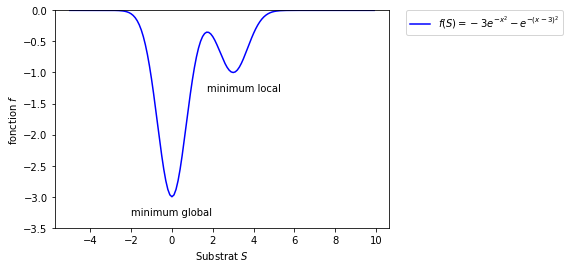

In [4]:
# Exemple d'une fonction ayant deux minimum locaux dont un est global
x = np.arange(-5,10,0.1)
f = -3*np.exp(-x**2)-np.exp(-(x-3)**2)

# tracé
plt.figure(1)
plt.plot(x,f,'b',label='$f(S)=-3 e^{-x^2}-e^{-(x-3)^2}$')
plt.text(-2,-3.3,'minimum global')
plt.text(1.7,-1.3,'minimum local')
plt.xlabel('Substrat $S$')
plt.ylabel('fonction $f$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(-3.5,0)
plt.show()


### <a name="gradient">Méthode du gradient</a>

L'**algorithme du gradient** est un algorithme d'optimisation (c'est à dire de minimisation ou maximisation) de fonction. Il est aussi appelé **algorithme de plus forte pente** ou **de plus profonde descente**.

Dans ce paragraphe on s'intéresse donc au problème de la minimisation d'une fonction $f:x\in \Omega \subset \mathbb{R}^n \mapsto f(x) \in \mathbb{R}$ sur un domaine $\Omega$:
$$ \min_{x\in\Omega} f(x)$$

On notera $\nabla f(x)$ le gradient de $f$ en $x$, c'est à dire le vecteur colonne des dérivées partielles de $f$ par rapport aux $x_i$ ($i=1:n$):
$$
\nabla f(x) =\left[ \begin{array}{c} \partial_{x_1}f(x) \\ \vdots \\ \partial_{x_n}f(x) \end{array} \right]
$$

L'algorithme de gradient repose sur la notion de **direction de descente**. Une direction de descente est définie localement autour d'un point $x\in\Omega$: c'est une direction, donc un vecteur $d\in \Omega\backslash \{0\}$ selon laquelle, au voisinage de $x$, la fonction $f$ décroit. Cela assure que si on suit cette direction, on va bien se rapprocher d'un minimum. Mathématiquement, cela s'écrit de la manière suivante. 

$d\in \Omega\backslash \{0\}$ est une **direction de descente** en $x$ pour $f$ si il existe un intervalle $\left[0,\alpha_0 \right]$ tel que:
$$ f(x+\alpha d)\leqslant f(x),\,\,\forall \alpha\in \left[0,\alpha_0 \right] $$
On parlera de **direction de descente stricte** si l'inégalité est stricte ($<$ au lieu de $\leqslant$).

On peut montrer que, si $\nabla f(x) \neq 0$, alors $d=-\nabla f(x)$ est une direction de descente stricte en $x$ pour $f$.

L'algorithme du gradient est donc donné par:

> <u>Algorithme du gradient</u>:
> - on choisit un nombre d'itérations maximal $N$, un seuil de précision $\epsilon$ et une valeur initiale $x_0$ pour $x$
> - initialisation: $k=0$ et calcul de $\nabla f(x_0)$
> - Tant que $k+1\leqslant N$ et $\left\|\nabla f(x_k)\right\|>\epsilon$ alors
>> \begin{eqnarray*} x_{k+1} & = & x_k - \alpha_k \nabla f(x_{k})\\
k & = & k+1 \end{eqnarray*}
>> où $\alpha_k$ peut être choisi selon différentes méthodes. 
> - $\hat{x}\simeq x_{k}$ et $\min_{x\in\Omega} f(x)\simeq f(x_k)$

Parmi les différents choix possible de $\alpha_k$ on notera les deux suivantes:
- Si $\alpha_k$ est une constante indépendante de $k$, on parlera d'**algorithme de gradient à pas fixe**.
- Le coefficient $\alpha_k$ peut être également choisi de sorte à minimiser $f(x_k-\alpha_k \nabla f(x_{k}))$. On parlera alors d'**algorithme de gradient à pas optimal**.

> <u>Exemple</u>:
> On veut minimiser la fonction:
> $$ f(k,a)=\frac{1}{N}\sum_{i=1}^N \left( k\frac{S_i}{a+S_i}-\mu_i \right)^2 $$
> Le gradient de $f$ est donné par:
> $$ \nabla f(k,a)= \left[ \begin{array}{c} \partial_{k}f(k,a)  \\ \partial_{a}f(k,a) \end{array} \right] = \left[ \begin{array}{c} \frac{2}{N}\sum_{i=1}^N \frac{S_i}{a+S_i}\left( k\frac{S_i}{a+S_i}-\mu_i \right) \\ -\frac{2}{N}\sum_{i=1}^N k\frac{S_i}{(a+S_i)^2}\left( k\frac{S_i}{a+S_i}-\mu_i \right) \end{array} \right]$$

**Application numérique**: utilisation des algorithmes de gradient à pas constant et à pas optimal

Critères d'arret pour les algorithmes
1. Nombre d'itération maximal = 35
2. Seuil de précision = 0.001


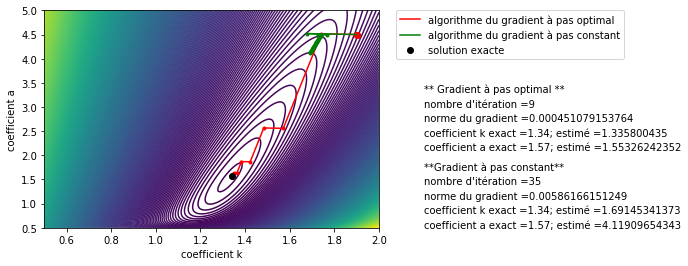

In [5]:
# Identification des paramètres a et k d'une fonction de Monod à l'aide de l'algorithme du gradient
# -------------------------------------------------------------------------------------------------
# les algorithmes de gradient à pas optimal et à pas constant sont testés

import scipy.optimize as scop # pour utiliser des algorithmes d'optimisation déjà codés sous python

# ------------------------------------------------------------------------------
#                      PARAMETRES POUVANT ETRE MODIFIES
# ------------------------------------------------------------------------------
# *** Paramètres des données
sigma1=0.2 #  ecart type bruit de mesure sur mu
sigma2=0.9 # ecart type bruit de mesure sur S
N =100 # nombre d'observation

# *** Paramètres des algorithmes de gradient
x0 = np.array([0.01,0.01]) # valeur initiale pour l'algorithme à pas optimal
x0c = np.array([0.01,0.01]) # valeur initiale pour l'algorithme à pas constant

x0 = np.array([1.9,4.5]) # valeur initiale pour l'algorithme à pas optimal
x0c = np.array([1.9,4.5]) # valeur initiale pour l'algorithme à pas constant

alpha_constant = 2 # valeur de alpha pour l'algorithme de gradient à pas constant

Nbiter = 35 # nombre d'itérations

precision = 0.001 # seuil de précision pour le critère d'arrêt des algorithmes

# *** Parametres du modèle de Monod
coeffk = 1.34 # coefficient k
coeffa = 1.57 # coefficient a

# ------------------------------------------------------------------------------

print('Critères d\'arret pour les algorithmes')
print('1. Nombre d\'itération maximal = '+str(Nbiter))
print('2. Seuil de précision = '+str(precision))

# *** Generation de donnees d'observation
S = np.linspace(0,15,num=N) # mesures du substrat
mu = coeffk*S/(coeffa+S) # sorties du modèle: calcul du mu
mub = mu+sigma1*(np.random.rand(N)-0.5) # bruitage des sorties mesurées
Sb = S + sigma2*(np.random.rand(N)-0.5) # bruitage des entrées mesurées
  
# *** fonction qui calcule la valeur de la fonction f à minimiser, ainsi que son gradient
def fonction_f(paramk,parama):
    global mub, Sb, N
    # f : fonction f
    # partialf_k : dérivée partielle de f par rapport à k
    # partialf_a : dérivée partielle de f par rapport à a
    # gradf : gradient de f
    
    # initialisation
    if len(paramk.shape)>0: # si les entrées sont vectorielles
        f = np.zeros((np.size(paramk,0),np.size(paramk,1)))
        partialf_k = np.zeros((np.size(paramk,0),np.size(paramk,1)))
        partialf_a = np.zeros((np.size(paramk,0),np.size(paramk,1)))
    else: # si les entrées sont scalaires
        f = 0
        partialf_k = 0
        partialf_a = 0
        
    # Boucle sur les données
    for i in np.arange(0,len(Sb)-1,1):
        mu = paramk*Sb[i]/(parama+Sb[i])
        # calcul de f qui est définie comme la somme sur les données (i=1:N) de
        # (k*S_i/(a+S_i)-mu_i)^2 divisée par N
        f = f + (mu-mub[i])**2
        # calcul de la dérivée partielle de f par rapport à k qui est définie comme
        # la somme sur les données (i=1:N) de 2*S_i/(a+S_i)*(k*S_i/(a+S_i)-mu_i) divisée par N
        partialf_k = partialf_k + 2*(mu-mub[i])*Sb[i]/(parama+Sb[i])
        # calcul de la dérivée partielle de f par rapport à a qui est définie comme
        # la somme sur les données (i=1:N) de -2*k*S_i/(a+S_i)^2*(k*S_i/(a+S_i)-mu_i) divisée par N
        partialf_a = partialf_a - 2*(mu-mub[i])*paramk*Sb[i]/((parama+Sb[i])**2)
    # division par N
    f = f/N
    partialf_k = partialf_k/N
    partialf_a = partialf_a/N
    # stockage du gradient
    gradf = np.array([partialf_k, partialf_a])
    return [f, gradf]

# *** Calcul de la fonction f pour le tracé
# on fait un maillage de l'espace des valeurs des paramètres k et a
# On se limite ici aux valeurs de k comprises entre 0.5 et 2
# et les valeurs de a comprises entre 0.5 et 5: ce choix est arbitraire
x , y = np.meshgrid(np.linspace(0.5,2,201),np.linspace(0.5,5,200))
z = fonction_f(x,y)
z = z[0]

# tracé des courbes de niveau de f, c'est à dire des courbes sur lesquelles f est constante
plt.figure(1)
graphe = plt.contour(x,y,z,400)
plt.xlabel('coefficient k')
plt.ylabel('coefficient a')

# fonction à minimiser dans l'algorithme de gradient à pas optimal pour obtenir la valeur de alpha
def fonction_falpha(alpha,x,gradfx):
    # dans l'algorithme de gradient à pas optimal, on cherche la valeur de alpha qui
    # minimise f(x_k-alpha gradf(x_k)) pour un x_k donné à chaque itération
    x1 = x - alpha*gradfx
    f = fonction_f(x1[0],x1[1])
    f = f[0]
    return f

# *** Algorithme du gradient

# 1. Gradient à pas optimal
# initialisation des vecteurs où seront stockées les valeurs intermédiaires obtenues avec les algorithmes itératifs
xval = np.zeros((Nbiter+1,2))

# stockage de la valeur initiale: le choix de cette valeur est effectué en début de code
xval[0]=x0
# le choix du nombre d'itérations ainsi que le seuil de précision du critère d'arrêt sont
# également effectués en début de code

# Tracé de la valeur initiale dans l'espace des paramètres
plt.plot(x0[0],x0[1],'ro')

# initialisation de la valeur du gradient de f
temp = fonction_f(np.asarray(x0[0]),np.asarray(x0[1]))
fx0 = temp[0] # valeur de f en x_k
gradfx0 = temp[1] # gradient de f en x_k
    
# Boucle itérative de l'algorithme de gradient à pas optimal
noiter = 1 # numéro de l'itération courante
while (noiter < Nbiter+1) and (np.sqrt(gradfx0[0]**2+gradfx0[1]**2)>precision):
     
    # calcul de la valeur de alpha optimale en utilisant ici une méthode de minimisation codée sous
    # python appelée algorithme de Nelder-Mead
    alphaopt = scop.minimize(fonction_falpha,0,args=(x0,gradfx0),method='Nelder-Mead')
    if alphaopt.success == True:
        alpha_k = alphaopt.x
    else:
        alpha_k = alpha_constant    
        
    # stockage et mise à jour des valeurs de paramètres
    xval[noiter] = x0 - alpha_k*gradfx0 # algorithme de gradient optimal
    
    # Tracé de la direction de descente dans l'espace des paramètres
    plt.plot(np.array([x0[0],xval[noiter][0]]),np.array([x0[1],xval[noiter][1]]),'r')
    
    # mise à jour pour l'itération d'après
    x0 = xval[noiter]
    noiter = noiter + 1
    
    # calcul de f et du gradient de f en x_k
    # pour le gradient à pas optimal
    temp = fonction_f(np.asarray(x0[0]),np.asarray(x0[1]))
    fx0 = temp[0] # valeur de f en x_k
    gradfx0 = temp[1] # gradient de f en x_k
    
    # Tracé des points dans l'espace des paramètres
    plt.plot(x0[0],x0[1],'r.')

# Affichage des légendes et des résultats
plt.plot(np.array([x0[0],xval[noiter-2][0]]),np.array([x0[1],xval[noiter-2][1]]),'r',label='algorithme du gradient à pas optimal')
plt.text(2.2,3.3,'** Gradient à pas optimal **')
plt.text(2.2,3.0,'nombre d\'itération ='+str(noiter-1))
plt.text(2.2,2.7,'norme du gradient ='+str(np.sqrt(gradfx0[0]**2+gradfx0[1]**2)))
plt.text(2.2,2.4,'coefficient k exact ='+str(coeffk)+'; estimé ='+str(x0[0]))
plt.text(2.2,2.1,'coefficient a exact ='+str(coeffa)+'; estimé ='+str(x0[1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# 2. Gradient à pas constant
# initialisation des vecteurs où seront stockées les valeurs intermédiaires obtenues avec les algorithmes itératifs
xvalc = np.zeros((Nbiter+1,2))

# stockage de la valeur initiale: le choix de cette valeur est effectué en début de code
xvalc[0]=x0c
# le choix du nombre d'itérations ainsi que le seuil de précision du critère d'arrêt sont
# également effectués en début de code

# Tracé de la valeur initiale dans l'espace des paramètres
plt.plot(x0c[0],x0c[1],'ro')

# initialisation de la valeur du gradient de f
temp = fonction_f(np.asarray(x0c[0]),np.asarray(x0c[1]))
fx0c = temp[0] # valeur de f en x_k
gradfx0c = temp[1] # gradient de f en x_k

# Boucle itérative de l'algorithme de gradient à pas constant
noiter = 1 # numéro de l'itération courante
while (noiter < Nbiter+1) and (np.sqrt(gradfx0c[0]**2+gradfx0c[1]**2)>precision):
        
    # stockage et mise à jour des valeurs de paramètres
    xvalc[noiter] = x0c - alpha_constant*gradfx0c # algorithme de gradient à pas constant
    
    # Tracé de la direction de descente dans l'espace des paramètres
    plt.plot(np.array([x0c[0],xvalc[noiter][0]]),np.array([x0c[1],xvalc[noiter][1]]),'g')
    
    # mise à jour pour l'itération d'après
    x0c = xvalc[noiter]
    noiter = noiter + 1
    
    # calcul de f et du gradient de f en x_k
    # pour le gradient à pas constant
    temp = fonction_f(np.asarray(x0c[0]),np.asarray(x0c[1]))
    fx0c = temp[0] # valeur de f en x_k
    gradfx0c = temp[1] # gradient de f en x_k  
    
    # Tracé des points dans l'espace des paramètres
    plt.plot(x0c[0],x0c[1],'g.')
    
# Affichage des légendes et des résultats
plt.plot(np.array([x0c[0],xvalc[noiter-2][0]]),np.array([x0c[1],xvalc[noiter-2][1]]),'g',label='algorithme du gradient à pas constant')
plt.plot(coeffk,coeffa,'ko',label='solution exacte')
plt.text(2.2,1.7,'**Gradient à pas constant**')
plt.text(2.2,1.4,'nombre d\'itération ='+str(noiter-1))
plt.text(2.2,1.1,'norme du gradient ='+str(np.sqrt(gradfx0c[0]**2+gradfx0c[1]**2)))
plt.text(2.2,0.8,'coefficient k exact ='+str(coeffk)+'; estimé ='+str(x0c[0]))
plt.text(2.2,0.5,'coefficient a exact ='+str(coeffa)+'; estimé ='+str(x0c[1]))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### <a name="NewtonRaphton">Méthode de Newton-Raphton</a>

La méthode de Newton-Raphton est un algorithme qui est destiné à trouver une approximation numérique d'un zéro (ou racine) d'une fonction $f$, c'est à dire la valeur de $x$ telle que $f(x)=0$.

Cette méthode peut être également utilisée en optimisation car le problème de minimisation d'une fonction $g$ revient au problème de recherche des zéros de la dérigée $g^\prime$ de la fonction.

> <u>Algorithme de Newton-Raphton</u>:
> - on choisit un nombre d'itérations maximal $N$, un seuil de précision $\epsilon$ et une valeur initiale $x_0$ pour $x$
> - initialisation: $k=0$ et calcul de $f(x_0)$
> - Tant que $k+1\leqslant N$ et $f(x_k)>\epsilon$ alors
>> \begin{eqnarray*} x_{k+1} & = & x_k - \frac{f(x_k)}{f^\prime(x_{k})} \\
k & = & k+1 \end{eqnarray*}
> - $\hat{x}\simeq x_{k}$ 


**D'où vient cette formule?**

Si on considère la formule de Taylor à l'ordre $1$ de f au voisinage de $x_k$:
$$ f(x) = f(x_k)+f^\prime(x_k)(x-x_k)+R_1(x) $$
où $R_1(x)$ est une fonction de $x$ négligeable par rapport aux autres termes du développement au voisinage de $x_k$.

Cela veut dire que si $x$ est proche de $x_k$ alors on peut négliger $R_1(x)$ et on a alors:
$$f(x) \simeq f(x_k)+f^\prime(x_k)(x-x_k)$$
Rappelons que la droite d'équation $y=f(x_k)+f^\prime(x_k)(x-x_k)$ est la tangente au graphe de $f$ en $x_k$. Faire cette approximation revient donc à considérer qu'autour de $x_k$ la courbe de $f$ est à peu près égale à sa tangente.

Au lieu de chercher le zéro de $f$ on va alors chercher le zéro de son approximation, c'est à dire de la tangente qui va nous donner une nouvelle valeur $x_{k+1}$ supposée plus proche du zéro de $f$ que $x_k$. Le point $x_{k+1}$ est donc défini par:
$$ 0 = f(x_k)+f^\prime(x_k)(x_{k+1}-x_k) \Longleftrightarrow x_{k+1} = x_k - \frac{f(x_k)}{f^\prime(x_{k})}$$

> **Exemple**
> On cherche à trouver la valeur du point d'équilibre du modèle de croissance d'une population de micro-organisme $B$ sur un substrat $S$ dans un réacteur batch donné par:
> $$
\left\{
\begin{array}{crl}
\frac{dB}{dt}= & \mu(S)B &-\frac{Q}{V}B\\
\frac{dS}{dt}= & -k\mu(S)B&+\frac{Q}{V}(S_0-S)  \\
\end{array}
\right.
$$
> Trouver l'équilibre pour lequel $B\neq 0$ revient à résoudre l'équation $\mu(S)-\frac{Q}{V}=0$, c'est à dire trouver les zéros de la fonction $S\mapsto \mu(S)-\frac{Q}{V}$. Nous allons résoudre cette équation grâce à l'algorithme de Newphton-Raphton.

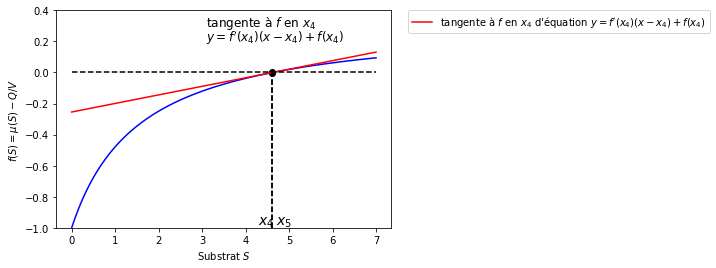

<function __main__.plot_iter>

In [6]:
# Illustration du principe de l'algorithme de Newton pour trouver les zéros d'une fonction
# ----------------------------------------------------------------------------------------
def fonction_f(S):
    # parametres du modele de Monod
    coeffk = 1.34 # coefficient k
    coeffa = 1.57 # coefficient a
    QsurV = 1 # valeur de Q/V
    
    # calcul de mu(S)
    mu = coeffk*S/(coeffa+S)
    # calcul de la dérivée de mu
    muprime = coeffk*coeffa/((coeffa+S)**2)
    # calcul de f=mu(S)-QsurV
    f = mu-QsurV
    # calcul de la dérivée de f
    fprime = muprime
    return [f, fprime]

# Calcul de la fonction f=mu(S)-Q/V pour le tracé
N = 200 # nombre de points pour le tracé
S = np.linspace(0,7,num=N) # mesures du substrat
f = fonction_f(S) # fonction f

def plot_iter(i):
    global xval
    # ième itération de l'algorithme de Newton
    x0 = xval[i] # valeur initiale du zéro
    temp = fonction_f(x0) # calcul de f=mu(S)-Q/V et sa dérivée
    fx0 = temp[0] # fonction f
    fprimex0 = temp[1] # dérivée de f
    x1 = x0 - fx0/fprimex0 # mise à jour de la valeur du zéro à l'itération i
    
    # tracé
    plt.figure(1)
    plt.plot(S,f[0],'b')
    plt.plot(x0,fx0,'ko')
    plt.text(x0*0.93,-0.98,'$x_{'+str(i)+'}$',fontsize=14)
    plt.plot(x1,0,'ko')
    plt.text(x1*1.02,-0.98,'$x_{'+str(i+1)+'}$',fontsize=14)
    plt.plot(np.array([0, 7]), fprimex0*(np.array([0, 7])-x0)+fx0,'r',
             label='tangente à $f$ en $x_{'+str(i)+'}$ d\'équation $y=f^\prime(x_{'+str(i)+'})(x-x_{'+str(i)+'})+f(x_{'+str(i)+'})$')
    plt.text(3.1,0.3,'tangente à $f$ en $x_{'+str(i)+'}$' ,fontsize=12)
    plt.text(3.1,0.2,'$y=f^\prime(x_{'+str(i)+'})(x-x_{'+str(i)+'})+f(x_{'+str(i)+'})$',fontsize=12)
    plt.plot(np.array([0, 7]), np.array([0, 0]),'k--')
    plt.plot(np.array([x0, x0]), np.array([-1, fx0]),'k--')
    plt.plot(np.array([x1, x1]), np.array([-1, 0]),'k--')
    plt.xlabel('Substrat $S$')
    plt.ylabel('$f(S)=\mu(S)-Q/V$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(-1,0.4)
    plt.show()

# Algorithme complet de Newton
Nbiter = 8 # nombre d'itérations
x0 = 0.5 # valeur initiale du zéro
xval = np.zeros((Nbiter+1,1)) # initialisation
xval[0]=x0 # stockage de la valeur initiale
for i in np.arange(1,Nbiter+1,1): # boucle d'itération
    temp = fonction_f(x0) # calcul de f=mu(S)-Q/V et de sa dérivée
    fx0 = temp[0] # fonction f
    fprimex0 = temp[1] # dérivée de f
    xval[i] = x0 - fx0/fprimex0 # mise à jour de la valeur du zéro à l'itération i
    x0 = xval[i] #stockage de la nouvelle estimation du zéro à l'itération i

# tracé intéractif pour voir l'évolution de l'estimation du zéro au cours des itérations
interact(plot_iter, i=(0,Nbiter,1))

## <a name="remarquesFinir">Quelques remarques pour finir</a>

### Analyse de sensibilité: quels paramètres doit on identifier?

Avant d'identifier les paramètres d'un modèle, il peut être intéressant, surtout si le nombre de paramètres est important, de faire une analyse de sensibilité. Cette analyse permet de quantifier l'impact de la variation des paramètres sur les sorties du modèle. 

Les résultats de l'analyse de sensibilité pourront être utilisés pour réduire le nombre de paramètres à identifier: seuls les paramètres ayant un impact non négligeable sur la sortie seront identifiés.

### Fonctions pré-codées

Il existe évidemment et heureusement des fonctions déjà codées en python/scilab/R/etc qui reprennent les algorithmes de minimisation.
